In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Clean_Dataset.csv")
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df[df.duplicated()]
## Now duplicates found.

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [4]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [7]:
## Ranaming the airline version
df['airline'].replace({"Air_India":"Air India", "GO_FIRST": "Go First"}, inplace=True)
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'Go First', 'Indigo',
       'Air India'], dtype=object)

In [8]:
## Renaming departure time and arrival time
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [9]:
time_rename = {"Early_Morning": "Early Morning", "Late_Night": "Late Night"}
df['departure_time'].replace(time_rename, inplace=True)
df['arrival_time'].replace(time_rename, inplace=True)
df['departure_time'].unique(), df['arrival_time'].unique()

(array(['Evening', 'Early Morning', 'Morning', 'Afternoon', 'Night',
        'Late Night'], dtype=object),
 array(['Night', 'Morning', 'Early Morning', 'Afternoon', 'Evening',
        'Late Night'], dtype=object))

In [10]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [11]:
df['stops'].replace({"two_or_more":"Two or more"}, inplace=True)
df['stops'].unique()

array(['zero', 'one', 'Two or more'], dtype=object)

<Axes: xlabel='airline,class'>

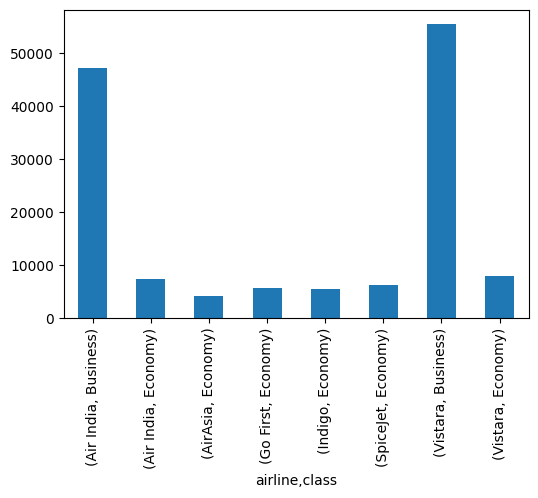

In [12]:
df.groupby(['airline', 'class'])['price'].mean().plot(kind='bar',figsize=(6, 4))

In [13]:
## Only two flight have bussiness class : Air India and Vistara
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [14]:
## Total no of different flights
df['flight'].unique().shape

(1561,)

In [15]:
## total no of flights from source to destination
df.groupby(['source_city', 'destination_city'])['flight'].unique().index.shape

(30,)

In [16]:
## There are 30 flight between arrival and destinations

In [17]:
df.groupby(['source_city', 'destination_city'])['duration'].mean().head(10)

source_city  destination_city
Bangalore    Chennai             14.480207
             Delhi                9.779956
             Hyderabad           14.162433
             Kolkata             13.099143
             Mumbai              10.905072
Chennai      Bangalore           13.952594
             Delhi               11.149374
             Hyderabad           13.153985
             Kolkata             14.515774
             Mumbai              12.374656
Name: duration, dtype: float64

In [18]:
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [19]:
## Now Encode all the string variables

for col in df.columns:
    print(f"No of unique in {col}: {df[col].unique().shape[0]}")


No of unique in airline: 6
No of unique in flight: 1561
No of unique in source_city: 6
No of unique in departure_time: 6
No of unique in stops: 3
No of unique in arrival_time: 6
No of unique in destination_city: 6
No of unique in class: 2
No of unique in duration: 476
No of unique in days_left: 49
No of unique in price: 12157


In [110]:
## Splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=43)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((240122, 30), (240122,), (60031, 30), (60031,))

In [112]:
from sklearn.metrics import mean_squared_error

In [113]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'